In [18]:
import pandas as pd
import numpy as np

gender_pay = pd.read_csv('gender_pay.csv')
gender_pay.dropna(inplace=True)
gender_pay.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0


## Data

The data contains 558 entries of arranged into 7 columns.

All_workers: Number of workers in each occupation category
All_weekly: Weekly wage of all workers by category
M_workers/ F_workers: Number of male/ female workers in each occupation
M_weekly/ F_weekly: Weekly wage of male/ female workers 

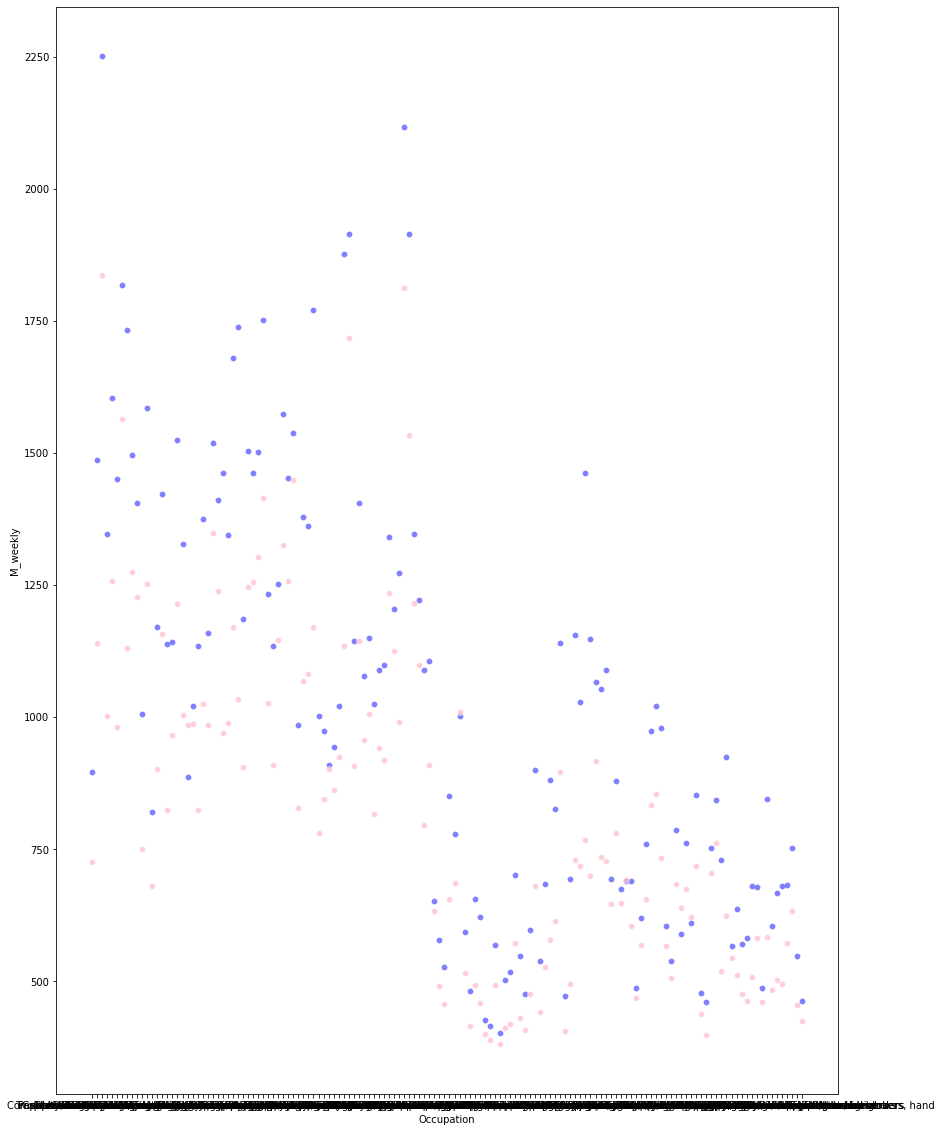

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,20))
sns.scatterplot(data = gender_pay, x = 'Occupation', y = 'M_weekly', color = 'blue', alpha =0.5)
sns.scatterplot(data = gender_pay, x = 'Occupation', y = 'F_weekly', color = 'pink', alpha =0.75)
plt.show()

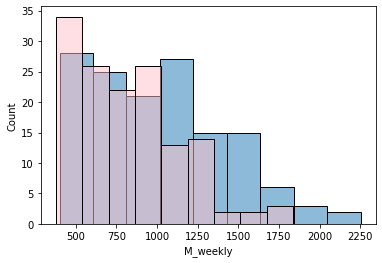

In [20]:
sns.histplot(data = gender_pay, x = 'M_weekly', alpha = 0.5)
sns.histplot(data = gender_pay, x = 'F_weekly', color = 'pink', alpha = 0.5)
plt.show()

### First glance shows a trend of men earning more than women

All the data included in one chart makes the data difficult to analyze. There seems to be a line where women earn the same amount across a fwe occupations.

I intend to examine the data in two ways going foward:

1) look at which occupations where women earn more than men.

2) Using a for loop break down groups of occupations into separate plots

In [21]:
women_higher = gender_pay[gender_pay['F_weekly'] >= gender_pay['M_weekly']]
women_higher.head(10)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
35,"Wholesale and retail buyers, except farm products",142,926.0,73,886.0,69,985.0
228,Police and sheriff's patrol officers,655,1002.0,569,1001.0,86,1009.0
304,"Bookkeeping, accounting, and auditing clerks",769,692.0,87,690.0,682,692.0
340,Data entry keyers,223,619.0,55,589.0,169,638.0
345,"Office clerks, general",929,620.0,156,609.0,773,622.0


### Women earned more than men in five occupations of this data set

The five occupations that women tended to earn more were typically office jobs such as office clerks, accountants and data entry. Women suprisngly edged out men by 8 dollars weekly in the field of of patrol officers.

In general men earn more than men, but does this paint a full picture? This data set is lacking in that it does not account for hours worked or experience

One thing the dataset has that can be usesful in identifying causes is which carriers are more dominated by men and which are more dominated by women. A data frame will be created to break down fields by distribution of male/ female

In [40]:
gender_pay['M:F_Ratio'] = gender_pay['M_workers'] / gender_pay['F_workers']
gender_pay['pay_Ratio'] = gender_pay['M_weekly'] / gender_pay['F_weekly']
gender_pay.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,1.256796,1.232782
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,1.424519,1.304653
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0,2.696113,1.226035
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0,3.074257,1.344311
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0,1.507937,1.274245


<AxesSubplot:xlabel='M:F_Ratio', ylabel='Count'>

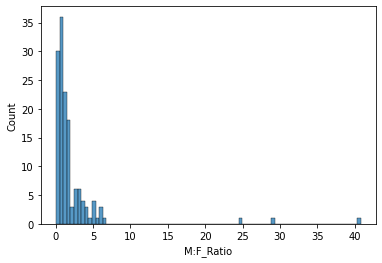

In [23]:
sns.histplot(data = gender_pay, x = 'M:F_Ratio')

<AxesSubplot:xlabel='M:F_Ratio', ylabel='pay_Ratio'>

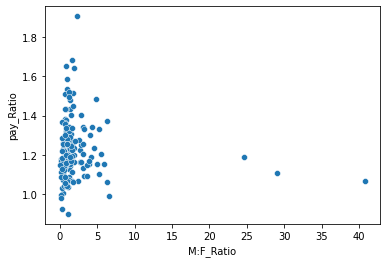

In [42]:
sns.scatterplot(data = gender_pay, x = 'M:F_Ratio', y = 'pay_Ratio' )

In [25]:
outliers = gender_pay[gender_pay['M:F_Ratio'] > 10]
outliers.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio
360,CONSTRUCTION,5722,749.0,5586,751.0,137,704.0,40.773723
401,MAINTENANCE,4301,839.0,4159,842.0,143,761.0,29.083916
528,Driver/sales workers and truck drivers,2687,747.0,2582,751.0,105,632.0,24.590476


In [35]:
outliers_5 = gender_pay[(gender_pay['M:F_Ratio'] >= 5) & (gender_pay['M:F_Ratio'] < 10) ]
outliers_5.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio
78,ENGINEERING,2656,1424.0,2272,1452.0,383,1257.0,5.932115
96,"Engineers, all other",393,1527.0,339,1537.0,54,1448.0,6.277778
130,Clergy,376,1002.0,316,1021.0,60,924.0,5.266667
228,Police and sheriff's patrol officers,655,1002.0,569,1001.0,86,1009.0,6.616279
237,Chefs and head cooks,340,619.0,285,656.0,55,492.0,5.181818


In [44]:
outliers_1 = gender_pay[(gender_pay['M:F_Ratio'] > 1.5) & (gender_pay['M:F_Ratio'] < 5) ]
outliers_1.head(66)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0,2.696113,1.226035
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0,3.074257,1.344311
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0,1.507937,1.274245
9,Computer and information systems managers,636,1728.0,466,1817.0,169,1563.0,2.757396,1.162508
16,"Transportation, storage, and distribution mana...",276,966.0,224,1006.0,52,749.0,4.307692,1.343124
31,"Managers, all other",2803,1408.0,1717,1525.0,1085,1213.0,1.582488,1.257214
54,Personal financial advisors,407,1419.0,248,1738.0,159,1033.0,1.559748,1.682478
61,COMPUTATIONAL,4009,1428.0,3036,1503.0,973,1245.0,3.120247,1.207229
63,Computer systems analysts,499,1389.0,325,1462.0,173,1256.0,1.878613,1.164013
65,Computer programmers,450,1438.0,357,1501.0,93,1302.0,3.838710,1.152842
